# Ch7. 신경망

[관련 연구]
- 신경망을 사용해 주식 수익률의 횡단면 가장 잘 설명할 수 있는 팩터 찾음
- 기업의 속성 & 거시경제 변수 -> 미래 수익률에 매핑
- 생성형 적대적 네트워크를 포함한 복잡한 신경망 구조로 가격 결정 커널 추정

[7.1] 오리지널 퍼셉트론
- 각각의 퍼셉트론: 단순 유닛 => 이 유닛은 층(layer)을 구성함
[7.2] 다층 퍼셉트론 (MLP)
- 헤비사이드(계단) 함수 = 활성화 함수: 목적은 매우 선형적인 모델에 비선형성 도입
(*) Notation:
- 데이터: 특성행렬 $X=x_{i,j}$ & 출력값 백터 $y=y_i$ 
- $x_i$: $X$의 한 줄을 나타냄
- 층 $l$에 위치한 유닛 $k$의 가중치: $W_k^{(l)}=w_{k,j}^{(l)}$ & 편향 $b_k^{(l)}$ & len=$U_{l-1}$
- 활성화 후출력: $o_{i,k}^{(l)}$ ~ i번째 인스턴스, l번째 층, k번째 유닛에 대한 출력

1. 은닉층 선형 결합
$$\\ v^{(l)}_{i,k} = (o^{(l-1)}_i)' w^{(l)}_k + b^{(l)}_k, \quad \text{for } l \ge 2$$
2. 은닉층 활성화
$$\\ o^{(l)}_{i,k} = f^{(l)}(v^{(l)}_{i,k})$$
3. 출력층 예측
$$\\ \tilde{y}_i = f^{(L+1)} \left( (o^{(L)}_i)' w^{(L+1)} + b^{(L+1)} \right)$$

- 레이블이 숫자인 경우: 출력=단일 수치
- 범주형인 경우: 범주의 개수와 같은 벡터(특정 카테고리에 속할 확률 나타냄)

[7.2.2] 보편 근사화
-> 신경망이 잘 작동하는 이유: 유계 연속 함수가 주어지면 이 함수를 임의의 정밀도까지 근사화할 수 있는 단일 계층 네트워크가 존재함
- 단일 계층 퍼셉트론:
$\\ f_n(x) = \sum_{l=1}^{n} c_l \phi(x w_l + b_l) + c_0$
- 모든 연속함수 $f$에 대해 하나의 $n$ 구할 수 있음: $|f(x) - f_n(x)|<\epsilon, \forall x \in [0,1]^d$
- 다항식 근사화와 유사 but 활성화 함수으 속성에 따라 차이 발생
- Result: 유닛의 개수를 늘릴 수 있는 한 간단한 신경망을 잘 작동하는 함수 $f$로 충분히 만들 수 있음
- 무작위로 샘플링한 $N$개의 $i.i.d.$ 포인트 $y_i=f(x_i)+\epsilon_i$에 대해 $f_n$이 훈련된 경우 최고의 경험치적 MSE:
$\\ E[(f(x) - f_n(x))^2] = O\left(\frac{c_f}{n}\right) + O\left(\frac{nK \log(N)}{N}\right)$
$\\ \rarr$ 1st 항: 네트워크 크기(복잡성) ~ 오차는 네트워크의 유닛 수에 따라 감소함
$\\ \rarr$ 2nd 항: 표본의 크기는 학습 품질을 결정하는 핵심 요소 ~ 오차가 관측 수에 비해 느린 속도로 감소 => 유닛 개수 & 입력 크기에 따라 선형임(표본 작으면 복잡한 모델 쓸모 없음)

[7.2.3] 역전파를 통한 학습
- 신경망: 약간의 불이익 감수하고 손실 함수를 최소화하는 방식으로 학습함
$O=\sum^I_{i=1}loss(y_i,\tilde{y}_i)+\text{패널티 항}$
- 손실 함수: in 회귀, 제곱오차 / in 분류, 교차 엔트로피
- 신경망의 학습: 모든 층에서 모든 유닛의 가중치를 변경해 위에서 정의한 $O$가 가장 최소가 되도록 함
$\\$Let's $D(\tilde{y}_i(W))=loss(y_i,\tilde{y}_i)$
- 가중치 업데이트 by 경사 하강법: $W\ \larr W-\eta\frac{\partial D(\tilde{y}_i)}{\partial W}$
- 연속적인 망으로 구성된 계층들과 관련된 활성화: 미분 연쇄 법칙의 수많은 반복을 요구함
- $l$번째 레이어에서 가중치 & 편향에 대한 경사 계산할 때 두 부분 있음:
1. 이전 레이어로부터 재활용할 수 있는 부분
2. 현재 레이어의 값과 활성화 함수로부터만 얻을 수 있는 부분

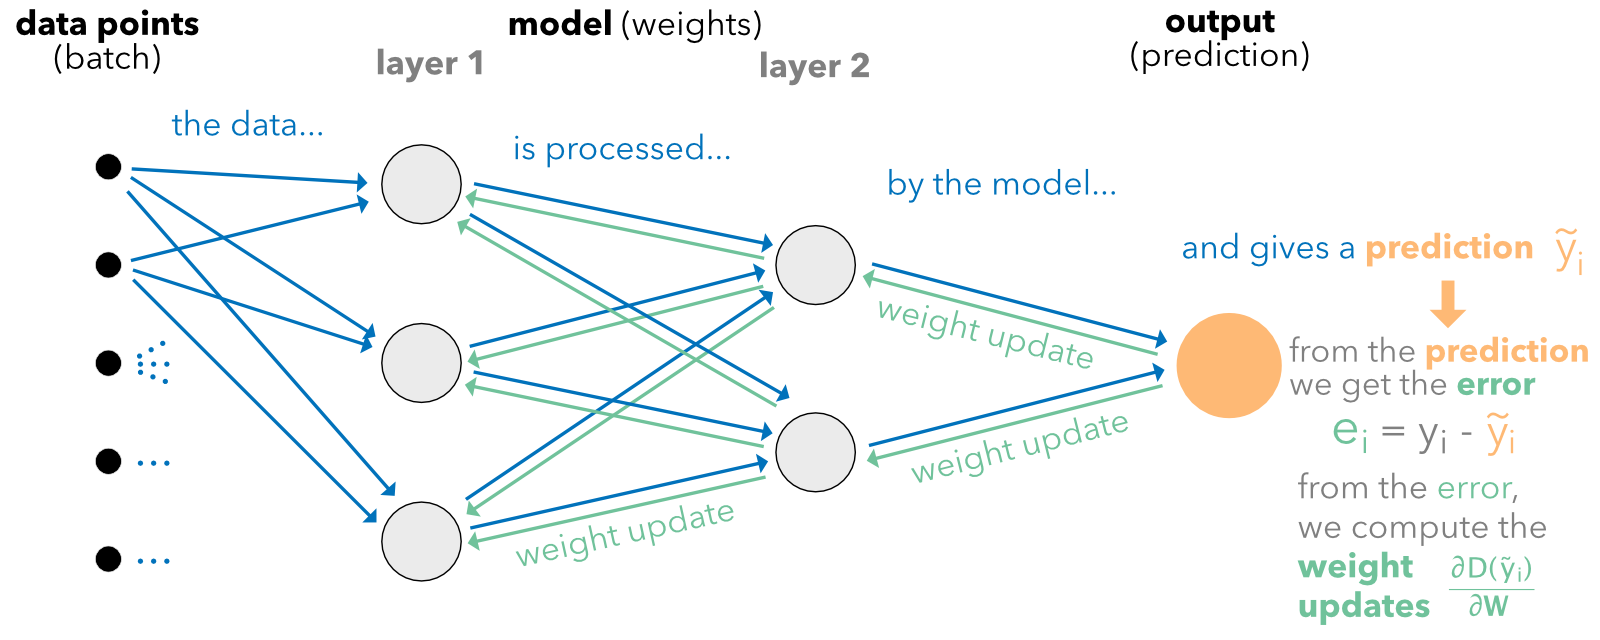

=> 역전파 알고리듬 w/ 데이터 포인트 샘플:
1. 데이터: 좌측에서 흘러 들어옴 ~ 순전파(Forward Pass)
2. 순전파: 오차 or 손실 함수 계산
3. for 가중치 & 편향, 이 함수의 모든 도함수: 마지막 층계에서 시작해 좌측으로 확산 ~ 역전파(Backward Pass)
4. 샘플 포인트를 기반으로 모든 가중치와 편향 업데이트 됨

(*) 학습률 조정:
1. $\\$각 Epoch 지난 후 업데이트 강도 줄임 
$\\ \eta=\alpha e^{-\beta t}$ ~ t: 에포크, $\alpha,\ \beta>0$
2. 모멘텀 사용 -> 최근 조정에 대한 기억 항 추가 => 현재 업데이트를 같은 방향으로 진행 => 수렴의 속도 높임
$$m_t \leftarrow \eta \frac{\partial D(\tilde{y}_i)}{\partial W_t} + \gamma m_{t-1}$$$$W_{t+1} \leftarrow W_t - m_t$$

[7.2.4] 분류에 관한 추가적 Detail
네트워크의 가장 끝에 적절한 활성화 함수 ~ Softmax 함수 사용:
$\\ s(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{J} e^{x_j}}$ ~ 클래스에 대한 확률 벡터 산출
손실함수: Cross-Entropy 사용: 
$\\ CE(y_i, \tilde{y}_i) = - \sum_{j=1}^{J} y_{i,j} \log(\tilde{y}_{i,j})$ ~ 두 인자 간 비유사도에 대한 대용치

[7.3] How deep 신경망? & Other Issues
- 매개 변수 개수: 인스턴스 개수보다 훨씬 작아야 함
- 현재 금융 응용 분야: 은닉층 개수는 서너 개 넘지 않음
$\\$If 입력에 I개의 특성, 출력에 O개의 차원, L개의 은닉층 ~ k번째 레이어의 유닛 개수:
$\\ U_k \approx \left\lfloor O \left(\frac{I}{O}\right)^{\frac{L+1-k}{L+1}} \right\rfloor$
$\\ \rarr$ 출력 크기에 따라 유닛 개수 기하급수적으로 감소
$\\$If 중간 레이어: 한 개, $\sqrt{IO}$의 정수 부분
- 매우 큰 아키텍처가 더 얕은 아키텍처보다 항상 더 나은 성능을 발휘하는 건 아님

[7.3.2] 가중치 업데이트의 빈도와 학습 듀레이션
- 배치(Batch) 라고 부르는 인스턴스 그룹에 대해 가중치 업데이트 수행됨
- 에포크: 샘플의 각 인스턴스가 가중치 업데이트(= 훈련)에 기여했을 때, 하나의 에포크에 도달함
- 배치 크기: 가중치의 단일 업데이트에서 사용하는 샘플의 개수
(i) 배치=only 1 인스턴스: '확률적 경사 하강(SGD)' ~ 인스턴스 무작위 선택
(ii) 1 < 배치 < 인스턴스: '미니' 배치 ~ 무작위 선택 but 비복원 추출
- 반복 횟수: 샘플 크기를 배치 크기로 나눈 비율 * 에포크 수


[7.3.3] 페널티와 드롭아웃
각 수준(Layer)에서 가중치(, 편향)에 대한 제약 조건이나 페널티 적용 가능 ~ in order to 훈련 샘플에 대한 과최적화 방지
- 페널티: 손실 함수에 직접 적용됨 => 목적함수:
$\\ O=\sum_{i=1}^I \text{loss}(y_i,\tilde{y}_i)+ \sum_{k} \lambda_k||\textbf{W}_k||_1+ \sum_j\delta_j||\textbf{W}_j||_2^2$
- 첨자 $k,\ j$: 각각 $L^1,\ L^2$ 페널티가 적용되는 가중치
- 훈련 중 가중치에 직접적 제약 조건 적용 가능
(i) 노름 제약: 가중치 벡터 or 행렬에 대한 최대 노름 고정
(ii) 비음수 제약: 모든 가중치는 양수 or 0
- 모델 크기 줄이기 ~ DropOut

[7.4] 코드 및 바닐라 MLP
신경망 구축 가능케 하는 프레임워크 & 라이브러리: Keras, Tensorflow, PyTorch

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


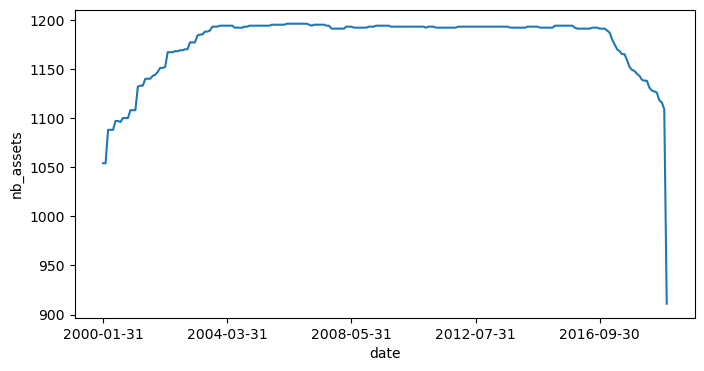

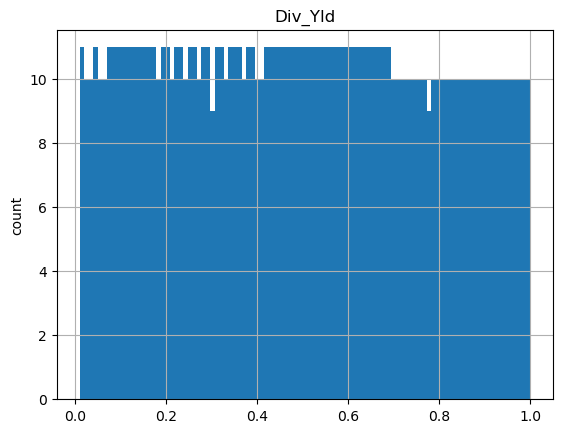

In [3]:
# 패널티 예측 회귀
import import_ipynb
from Ch1 import data_ml, features, idx_train, idx_test
training_sample=data_ml[data_ml.index.isin(idx_train)]
testing_sample=data_ml[data_ml.index.isin(idx_test)]

In [4]:
!pip install plot_keras_history

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created 

In [4]:
# Step 1. 회귀
# Keras: Tensorflow의 고차원 API
import tensorflow as tf
from plot_keras_history import show_history, plot_history
NN_train_features=training_sample[features].values
NN_train_labels=training_sample['R1M_Usd'].values
NN_test_featurs=testing_sample[features].values
NN_test_labels=testing_sample['R1M_Usd'].values


In Keras:
1. 네트워크의 구조/아키텍처 정의
2. 손실 함수 및 학습 프로세스(가중치 업데이트에 대한 옵션) 설정
3. 배치 크기와 라운드 개수(에포크) 지정

In [5]:
# Ex. 2개의 은닉층
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(len(features),))) # input_shape: 첫 번째 층계에서만 필요
model.add(layers.Dense(8,activation='tanh')) # 양/음수 출력 모두 생성 ~ 마지막에서 두 번째 층계에 사용
model.add(layers.Dense(1))

c:\Users\82103\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='RMSprop', # 고전적인 미니 배치 역전파 구현(가중치 업데이트 알고리듬)
              loss='mse',
              metrics=['MeanAbsoluteError']) # 모델의 품질 평가 ~ 손실 함수와 다를 수 있음
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - MeanAbsoluteError: 0.0856 - loss: 0.0294 - val_MeanAbsoluteError: 0.0672 - val_loss: 0.0371
Epoch 2/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.0840 - loss: 0.0290 - val_MeanAbsoluteError: 0.0671 - val_loss: 0.0371
Epoch 3/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0290 - val_MeanAbsoluteError: 0.0671 - val_loss: 0.0371
Epoch 4/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0290 - val_MeanAbsoluteError: 0.0675 - val_loss: 0.0371
Epoch 5/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0290 - val_MeanAbsoluteError: 0.0671 - val_loss: 0.0371
Epoch 6/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0289 - val_MeanAbsoluteError: 0.0668 - val_loss: 0.0370
Epoch 7/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0289 - val_MeanAbsoluteError: 0.07

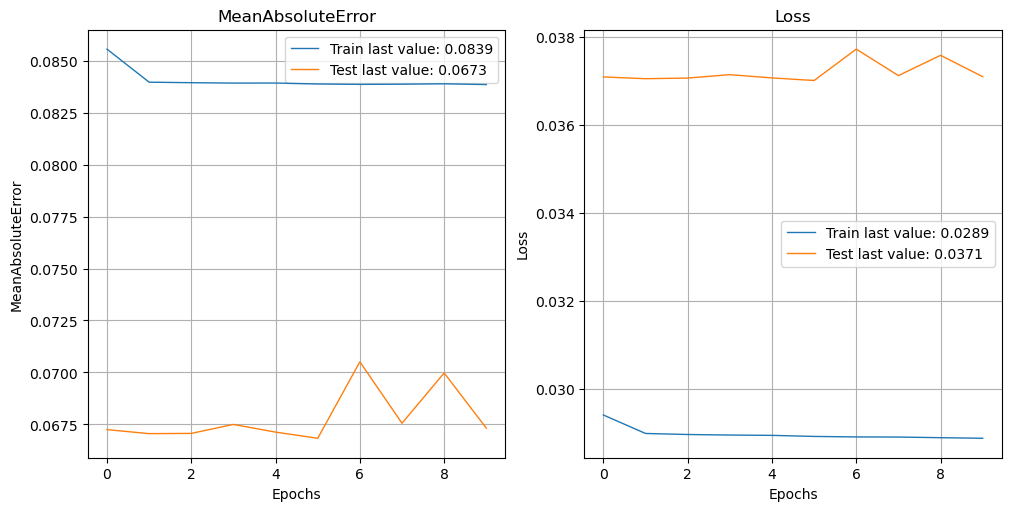

In [ ]:
# 모델을 데이터에 맞추고 Additional 훈련 매개 변수 필요
fit_NN=model.fit(
    NN_train_features,
    NN_train_labels,
    batch_size=256, # GPU 훈련과 관련된 기술적 이유로 2의 거듭제곱인 경우가 많음
    epochs=10,
    validation_data=(NN_test_featurs,NN_test_labels),
    verbose=True
)
show_history(fit_NN)
# 신경망: 가중치 무작위 초기화 -> 문제 우회하는 방법: 난수 생성기 고정 By set_weights() 함수

In [6]:
# 모델의 매개변수 얻기 위해
# get_weights(모델) 함수 호출 가능
import numpy as np
hitratio=np.mean((model.predict(NN_test_featurs).flatten()*NN_test_labels.flatten())>0)
print(f'Hit Ratio:{hitratio}')

2194/2194 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Hit Ratio:0.5054409753874203


In [7]:
# Step 2. 분류
# 원=핫 인코딩
from tensorflow.keras.utils import to_categorical
NN_train_labels_C=to_categorical(training_sample['R1M_Usd_C'].values)
NN_test_labels_C=to_categorical(testing_sample['R1M_Usd_C'].values)

In [ ]:
from tensorflow.keras import initializers
from tensorflow.keras.constraints import non_neg
initializer=initializers.RandomNormal()
model_C=keras.Sequential()
# Keras에서는 가중치를 Kernel이라고 부름
model_C.add(layers.Dense(16, activation='tanh',input_shape=(len(features),), 
                         kernel_initializer=initializer, kernel_constraint=non_neg())) # 가중치 초기화 + 가중치 nonnegative
model_C.add(layers.Dropout(.25))
model_C.add(layers.Dense(8, activation='relu',
                         bias_initializer=initializers.Constant(0.2), # 편향 초기화
                         kernel_regularizer='l2')) # 가중치 패널티 적용 (L^2 노름의 0.01배만큼 페널티 받음)
model_C.add(layers.Dense(2, activation='softmax'))
# L1 규제: LASSO, L2 규제: Ridge


c:\Users\82103\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_C.compile(
    optimizer=keras.optimizers.Adam( # 가중치 업데이트 with 모멘텀
        learning_rate=0.01,
        beta_1=0.9,
        beta_2=0.95),
        loss=keras.losses.BinaryCrossentropy(from_logits=True), # categorical_crossentropy: 클래스 개수와 상관없이 작동함
        metrics=['categorical_accuracy']
    )
model_C.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,642 (6.41 KB)

 Trainable params: 1,642 (6.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


c:\Users\82103\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:1286: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


387/387 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - categorical_accuracy: 0.5025 - loss: 0.6987 - val_categorical_accuracy: 0.5037 - val_loss: 0.6932
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.4999 - loss: 0.6932 - val_categorical_accuracy: 0.4963 - val_loss: 0.6932
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - categorical_accuracy: 0.5020 - loss: 0.6932 - val_categorical_accuracy: 0.5037 - val_loss: 0.6931
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.5002 - loss: 0.6932 - val_categorical_accuracy: 0.5037 - val_loss: 0.6932
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.5001 - loss: 0.6932 - val_categorical_accuracy: 0.5037 - val_loss: 0.6931


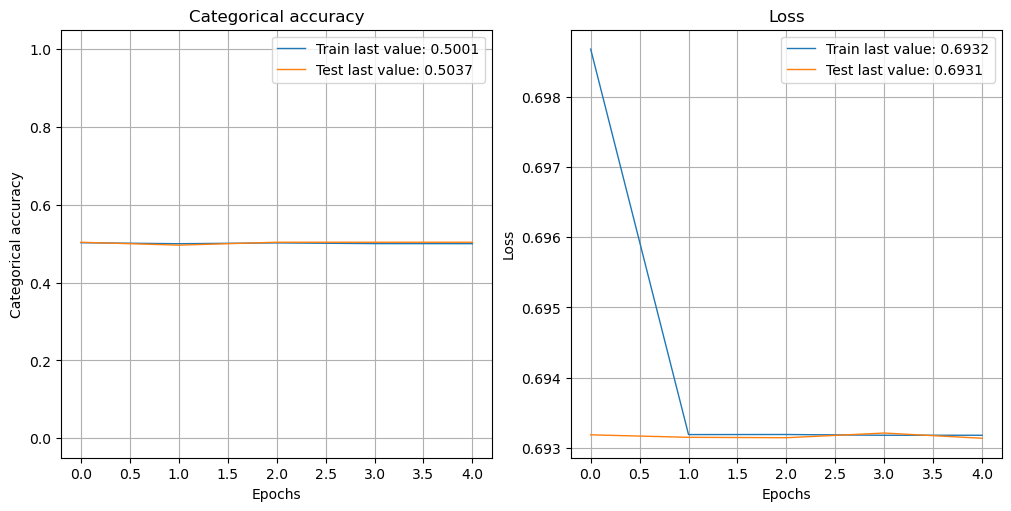

In [11]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                          min_delta=0.001,
                                          patience=4, # 개선 없을 시 사용할 에포크 수
                                          verbose=0)
fit_NN_C=model_C.fit(
    NN_train_features, NN_train_labels_C,
    batch_size=512, epochs=20,
    validation_data=(NN_test_featurs,NN_test_labels_C),
    verbose=True,
    callbacks=[callback]
)
show_history(fit_NN_C)

콜백: 학습 과정의 특정 단계에서 사용 가능한 함수
$\\$ in Example, 이러한 함수 중 하나를 사용해 일정 시간 동안 진전이 없을 시 알고리듬 중지함
$\\$ in Example, 유효성 검사 정확도에 초점을 맞춤
$\\$ in Example, min_delta: 알고리듬이 계속 작동하기 위해 달성해야 하는 최소 개선 사항


[7.4.3] 커스텀 손실
$\\$ In Keras, 사용자가 손실 함수 지정 가능

In [12]:
model_custom=keras.Sequential()
model_custom.add(layers.Dense(16, activation='relu',input_shape=(len(features),)))
model_custom.add(layers.Dense(8,activation='sigmoid'))
model_custom.add(layers.Dense(1))

c:\Users\82103\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 손실 함수 직접 코딩 & 모델에 통합
def custom_loss(y_true, y_pred):
    loss=tf.reduce_mean(
        # 예측값의 변동성은 제어하면서 실제 시장 방향성과 커플링되는 신호를 찾아라
        tf.square(y_pred-tf.reduce_mean(y_pred))-5*tf.reduce_mean(
            (y_true-tf.reduce_mean(y_true))*(y_pred-tf.reduce_mean(y_pred))))
    return loss
model_custom.compile(
    optimizer='RMSprop',
    loss=custom_loss,
    metrics=['MeanAbsoluteError']
)

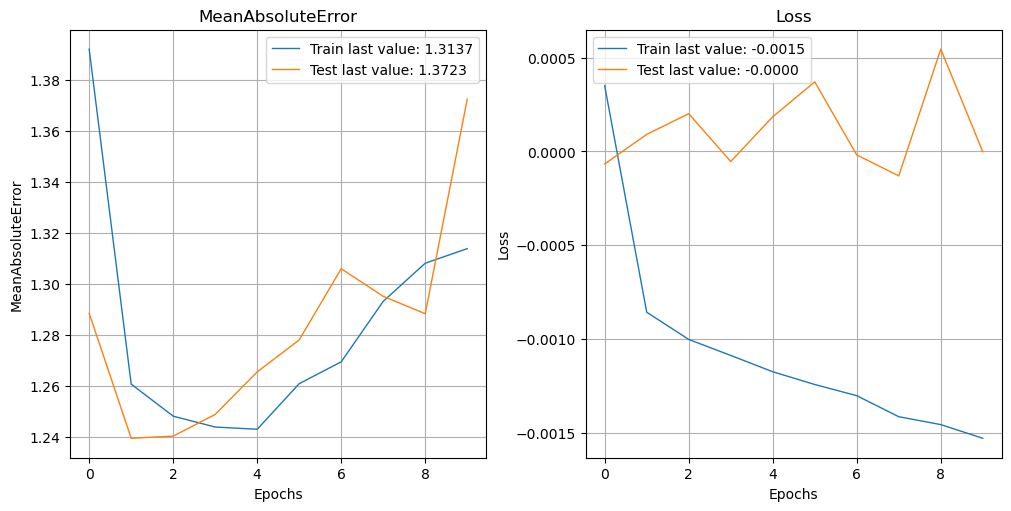

In [14]:
fit_NN_cust=model_custom.fit(
    NN_train_features, NN_train_labels,
    batch_size=512, epochs=10,
    validation_data=(NN_test_featurs, NN_test_labels),
    verbose=False
)
show_history(fit_NN_cust)

In [16]:
hitratio=np.mean(model_custom.predict(NN_test_featurs).flatten()*NN_test_labels.flatten()>0)
print(f'Hit Ratio: {hitratio}')

2194/2194 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Hit Ratio: 0.5460346399270738


[7.5] 순환 신경망
- 다층 퍼셉트론: 데이터가 중간에 반복되지 않고 왼쪽에서 오른쪽으로 흐름 -> 피드포워드 네트워크

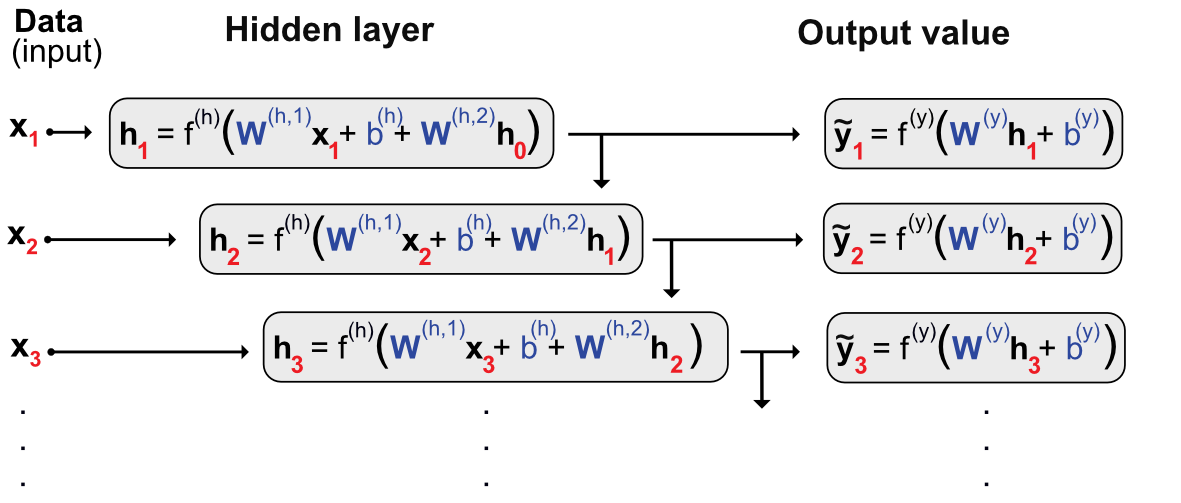

1st 입력: 첫 번째 레이어에 영향
$h_1$을 통해 2nd 및 이후 같은 방식으로 모든 레이어에 영향을 미침
-> 주요 Problem: 기울기 소실(vanishing gradient)로 인한 기억의 손실 ~ 모델의 깊이 때문에 역전파에 사용되는 연쇄 규칙은 활성화 함수 도함수의 많음 곱셈
=> 점진적 할인을 방지하는 방법이 LSTM
=> 더 간결한 모델: GRU(Gated Recurrent Unit)

1. Reset Gate: $r_i = \text{sig}(w'_r x_i + b_r + u_r \tilde{y}_{i-1})$
2. Update Gate: $z_i = \text{sig}(w'_z x_i + b_z + u_z \tilde{y}_{i-1})$
3. Output/Hideen state: $\tilde{y}_i = z_i \tilde{y}_{i-1} + (1 - z_i) \tanh(w'_y x_i + b_y + u_y (r_i \odot \tilde{y}_{i-1}))$
$\\ \rarr z_i \times \text{(과거)} + (1-z_i) \times \text{(새로운 정보)}$ 형태의 가중 평균

주식 기반 시계열: 학습은 한 번에 한 종목씩 순차적으로 이루어짐
1. 배치 크기: 자산의 개수 (날짜별)
2. 시간 단계: 단순히 날짜의 개수
3. 특성의 수: 하나 ~ 에측 인자의 개수

In [17]:
from Ch1 import stock_ids_short, separation_date
data_rnn=data_ml[data_ml['stock_id'].isin(stock_ids_short)]

training_sample_rnn=data_rnn[data_rnn['date']<separation_date]
testing_sample_rnn=data_rnn[data_rnn['date']>separation_date]

nb_stocks=len(stock_ids_short)
nb_feats=len(features)

nb_dates_train=training_sample_rnn.shape[0]//nb_stocks
nb_dates_test=testing_sample_rnn.shape[0]//nb_stocks
nn_train_features=training_sample_rnn[features].values
nn_test_features=testing_sample_rnn[features].values
nn_train_labels=training_sample_rnn['R1M_Usd'].values
nn_test_labels=testing_sample_rnn['R1M_Usd'].values


In [18]:
train_features_rnn=np.reshape(nn_train_features, (nb_stocks, nb_dates_train, nb_feats)) # 주식, 날짜 특성 순
test_features_rnn=np.reshape(nn_test_features, (nb_stocks, nb_dates_test, nb_feats))

train_labels_rnn=np.reshape(nn_train_labels, (nb_stocks, nb_dates_train,1))
test_labels_rnn=np.reshape(nn_test_labels, (nb_stocks, nb_dates_test,1))

In [20]:
model_RNN=keras.Sequential()
model_RNN.add(layers.InputLayer(batch_input_shape=(nb_stocks, nb_dates_train, nb_feats)))
model_RNN.add(layers.GRU(16,activation='tanh', return_sequences=True)) # 모든 시퀀스 반환
model_RNN.add(layers.Dense(1))
model_RNN.compile(optimizer='RMSprop',
                  loss='mse', metrics=['MeanAbsoluteError'])

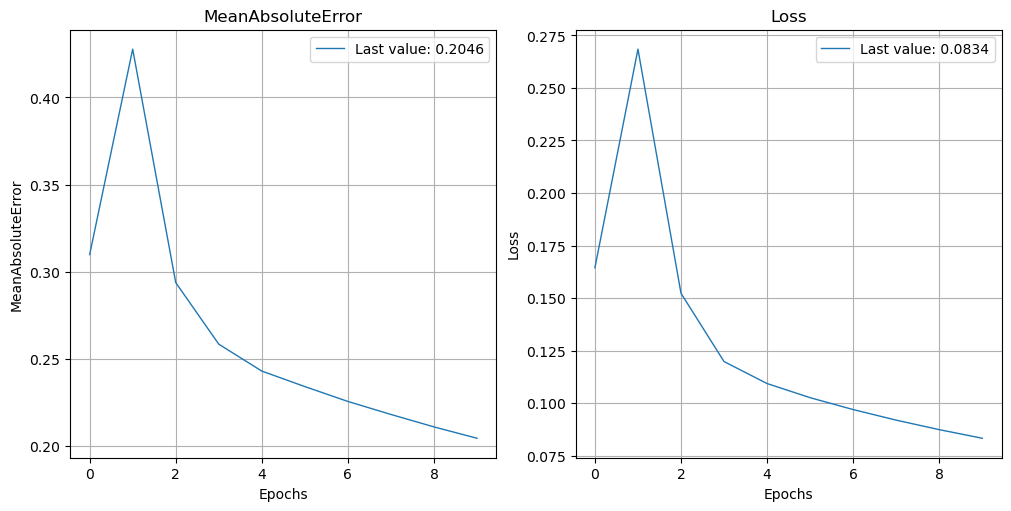

In [22]:
fit_RNN=model_RNN.fit(train_features_rnn, train_labels_rnn, epochs=10, batch_size=nb_stocks, verbose=False)
show_history(fit_RNN)

In [23]:
# 모델 복제: Keras ~ 훈련 및 테스트 샘플이 모두 동일한 차원을 공유해야 함
new_model=keras.Sequential()
new_model.add(layers.InputLayer(batch_input_shape=(nb_stocks, nb_dates_train, nb_feats)))
new_model.add(layers.GRU(16, activation='tanh', return_sequences=True))
new_model.add(layers.Dense(1))
new_model.set_weights(model_RNN.get_weights())

In [24]:
pred_rnn=new_model.predict(test_features_rnn, batch_size=nb_stocks)
hitratio=np.mean(np.multiply(pred_rnn,test_labels_rnn)>0)
print(f'Hit Ratio: {hitratio}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Hit Ratio: 0.49295922656578395


(+) LSTM & GRU 보다 더 간단한 $\alpha$-RNN: 장기 메모리 생성 위해 간단한 자동 상관관계가 추가되는 기본적인 순환 신경망으로 구성됨